In [1]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "../indata/7deSeptiembre.inp"
fc = "../indata/7deSeptiembre.config"
fi = "../indata/cltest10.inp"
fc = "../indata/cltest10.config"
mtype = 1
kw = .45/86400.
n1 = PyNetwork(fi,fc,mtype)
Q0 = np.ones(n1.M+1); 
#for i in range(n1.M/2,n1.M+1):
#    Q0[i] = 0
M = n1.M
#n1.setbVal(0,Q0)

Clvals0 = np.ones(M+1)
Clvals1 = np.zeros(M+1)
for i in range(1,sum(n1.nodeTypes==1)):
    n1.setClbVal(i,Clvals1)
Cl0 = np.ones(n1.Ns[0])
Cl1 = np.ones(n1.Ns[1])
n1.setCl0(0,Cl0)
n1.setCl0(1,Cl1)
n1.setClkw(0,kw)
n1.setClkw(1,kw)
for i in range(2, n1.Nedges):
    n1.setCl0(i,np.zeros(n1.Ns[i]))
    n1.setClkw(i,kw)
n1.setClbVal(0,Clvals0)


In [3]:
i = 1
h = n1.Clhist(i)
print h[0:(n1.Ns[i])]

[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [4]:
dt = n1.T/n1.M
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)


In [5]:
print "T = %f" %n1.T
print "Solve time = %f" %n1.solve_time
print "dt = %f" %dt
print sum(n1.nodeTypes==1)
print n1.nodeTypes

T = 100.000000
Solve time = 8.325111
dt = 0.033333
4
[1 2 2 3 3 3 1 1 3 1]


In [6]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

720.17407771
1856.56816629
10
[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
67.9660545434
dx/dt = 300.000000


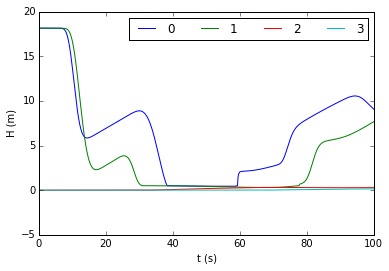

In [7]:
#show time series at a sensor in the middle of each pipe in the network
print n1.getTotalVolume()-V0
print V0
print n1.Nedges
print n1.a
print max(n1.cmax)
mdx = min([n1.Ls[i]/n1.Ns[i] for i in range(n1.Nedges)])
T = n1.T
M = n1.M
dt = T/M
print "dx/dt = %f" % (mdx/dt)
pipes = [PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], n1.M, n1.a[i]) for i in range(n1.Nedges)]
t = linspace(0,T,M+1)
for i in range(0,4):
    qhist = n1.qhist(i)
    P = [pipes[i].pbar(qhist[idx_t(0,n1.Ns[i]/2,n, n1.Ns[i])],False) for n in range(M+1)]
    plot(t,P) 
    legend(['%d'%i for i in range(n1.Nedges)], ncol=7)
ax = gca()
ax.set_xlabel('t (s)')
ax.set_ylabel('H (m)')

(3001, 100)
(0, 110)


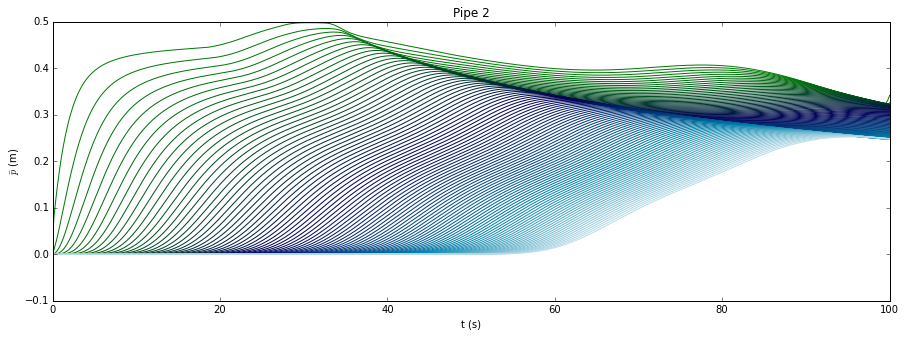

In [8]:
#show time series at different sensors along the length of a single pipe
i = 2
M = n1.M
from matplotlib import cm
import matplotlib.colors as colors
fig = figure(figsize= (15,5))
qhist = n1.qhist(i)
xs = np.arange(1,n1.Ns[i]+1)
#set_clim(0,xs[-1])
t = np.linspace(0,n1.T,M+1)
P = np.zeros((len(t),len(xs)))
print shape(P)
SHIT = cm.get_cmap('ocean') 
cNorm  = colors.Normalize(vmin=0, vmax=xs[-1]+10)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=SHIT)
print scalarMap.get_clim()
dx= n1.Ls[i]/n1.Ns[i]
for J in range(len(xs)):
    #P[:,J]=[pipes[i].pbar(qhist[idx_t(0,xs[J],n, n1.Ns[i])],False) for n in range(M+1)]
    cval = scalarMap.to_rgba(xs[J])
    P =[pipes[i].pbar(qhist[idx_t(0,xs[J],n, n1.Ns[i])],False) for n in range(M+1)]
    q=plot(t,P,color =cval,label="x = %.1f"%(dx*xs[J]))
    
ax = gca()
ax.set_title('Pipe %d'%i)
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$\bar{p}$ (m)')
#legend(loc = 'upper left')
savefig("../sensors_pipe%d.eps"%i, format='eps')

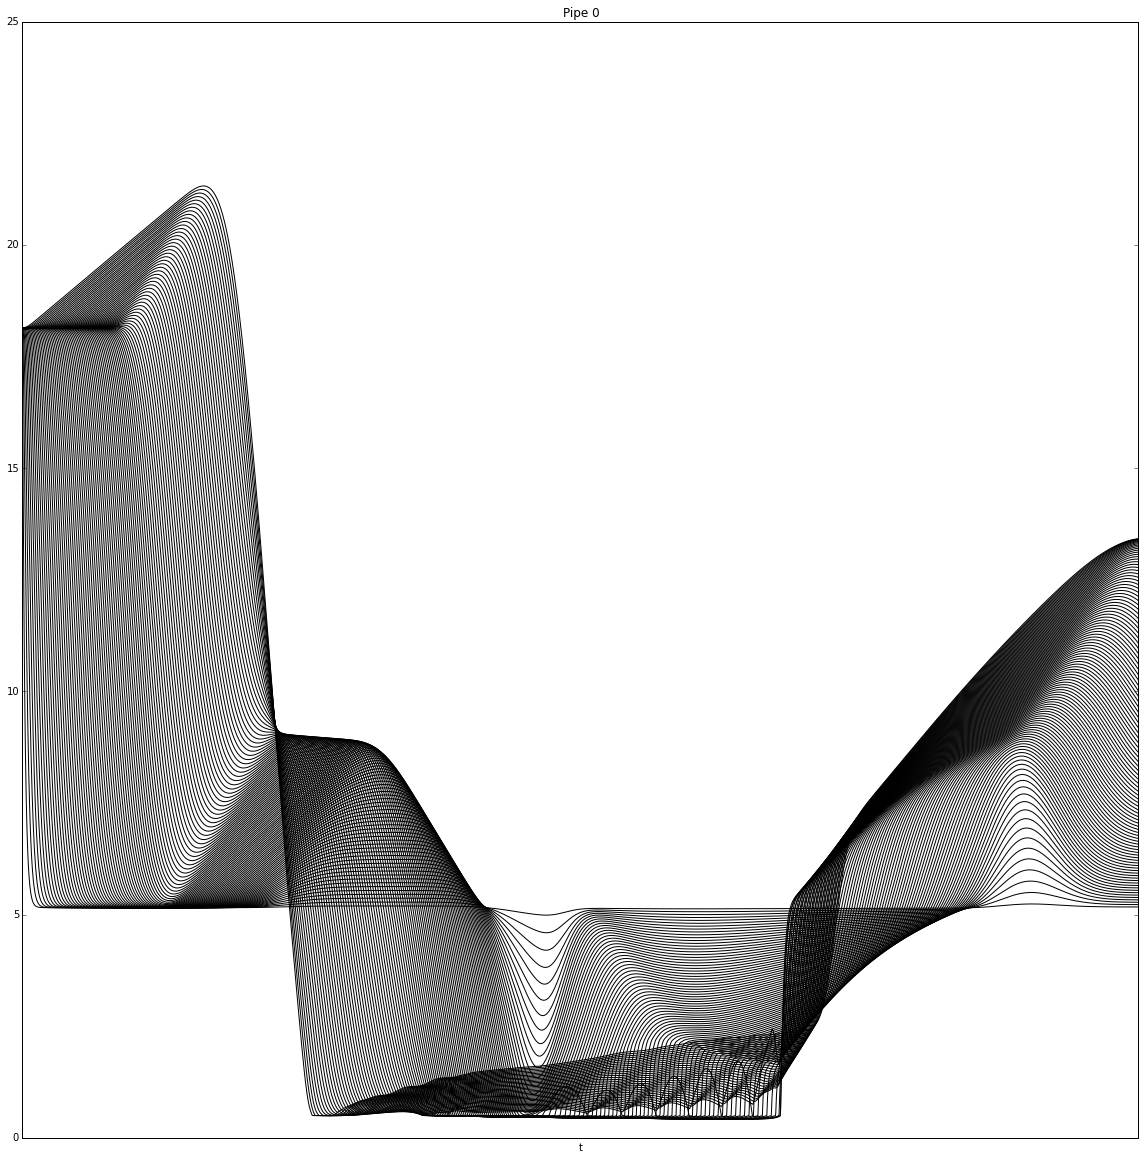

In [9]:
i = 0
M = n1.M
fig = figure(figsize= (20,20))
#for i in range(10,11):
for J in range(1,n1.Ns[i]):
#        subplot(14,1,i)
        qhist = n1.qhist(i)
        P = [pipes[i].pbar(qhist[idx_t(0,J,n, n1.Ns[i])],False) for n in range(M+1)]
        plot(t,P,'k')
        ax = gca()
        ax.set_title('Pipe %d'%i)
        ax.set_xticks([])
ax.set_xlabel('t')
#savefig("../blargh.eps", format = 'eps')

(0, 10)
max = 1.000000e+00, min = 0.000000e+00
max = 1.000000e+00, min = 0.000000e+00
max = 9.998191e-01, min = 0.000000e+00
max = 9.979209e-01, min = 0.000000e+00
max = 9.980546e-01, min = 0.000000e+00
max = 8.891691e-01, min = 0.000000e+00
max = 8.958313e-01, min = 0.000000e+00
max = 6.181384e-02, min = 0.000000e+00
max = 9.970543e-01, min = -6.965581e-02
max = 2.734551e-03, min = 0.000000e+00


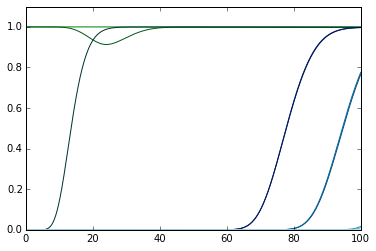

In [9]:
cNorm  = colors.Normalize(vmin=0, vmax=n1.Nedges)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean'))
print scalarMap.get_clim()
t = linspace(0,T,M+1)
for k in range(0,n1.Nedges):
    M = n1.M
    N = n1.Ns[k]
    j = 1
    Clh = n1.Clhist(k)
    Clj = Clh[10::N+2]
    print "max = %e, min = %e"%(max(Clh), min(Clh))
    plot(t,Clj[0:-1], color = scalarMap.to_rgba(k), label = 'pipe %d'%k)
    ylim(0,1.1)
#legend(loc = 'lower left',ncol =4)

In [11]:
Clh = n1.Clhist(1)
N = n1.Ns[1]
Clj = Clh[2::N+2]
dx = n1.Ls[0]/n1.Ns[0]
print dx/dt
print n1.cmax[0]*dt/dx
print Clj

300.0
0.226000831022
[ 1.          0.99996825  0.9998747  ...,  0.99809276  0.99809201  0.        ]


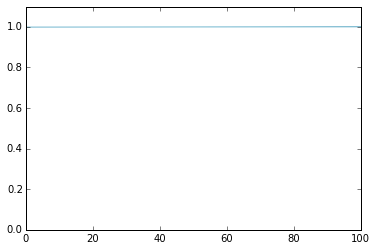

In [12]:
K = 0
Clh = n1.Clhist(K)
M = n1.M
N = n1.Ns[K]
cNorm  = colors.Normalize(vmin=0, vmax=n1.Ns[K])
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean'))
for k in range(0,n1.Ns[K],5):
    Clj = Clh[k::N+2]
    #print "max = %e, min = %e"%(max(Clh), min(Clh))
    plot(t,Clj[0:-1], color = scalarMap.to_rgba(k), label = 'location %d'%k)
    ylim(0,1.1)
#legend(loc='lower left')

(0, 1.1)

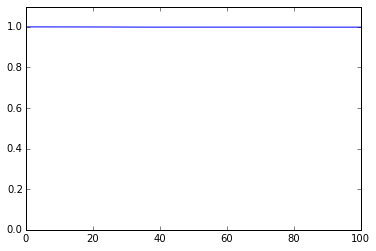

In [13]:
MM= 2000
x = linspace(0,100,N+1)
ts = Clh[MM*(N+2):(MM+1)*(N+2)-1]
plot(x,ts)
ylim(0,1.1)

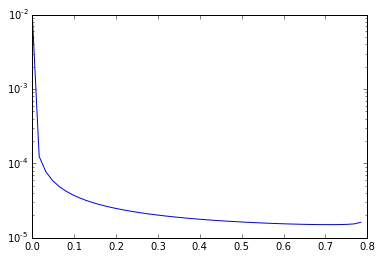

In [14]:
n1.setClkw(0,kw)
D = n1.Ds[0]
ys = linspace(1e-6,(D**2)*pi/4-1e-3)
kws = [n1.getKCl(0,y,1) for y in ys]
semilogy(ys,kws)

In [15]:
print range(2,10)

[2, 3, 4, 5, 6, 7, 8, 9]


In [16]:
print pipes[0].AofH(20,True)

0.843894621039
